In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.36019,0.16134,NaN,3.53370,NaN,0.67908,3.43440,NaN,NaN,1.69910,3.815600,1.746400
1,NaN,-0.17857,2.06280,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,NaN,0.772910,0.641450
2,-0.16946,0.50153,NaN,NaN,1.567600,1.48240,0.92160,2.64240,NaN,2.53180,2.432800,1.876800
3,NaN,0.47279,0.58809,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,NaN
4,0.09883,0.23418,0.42970,1.63120,NaN,2.27110,0.37425,2.17860,1.31400,NaN,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.76900,NaN,1.57600,0.55612,0.070769,2.07470,NaN,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.46660,-4.03460,NaN,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.34480,-2.38430,2.03100,2.26460,NaN,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,NaN
798,3.44140,-5.21630,1.57700,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	130
float64		column 2	104
float64		column 3	263
float64		column 4	211
float64		column 5	185
float64		column 6	185
float64		column 7	104
float64		column 8	159
float64		column 9	156
float64		column 10	159
float64		column 11	130
float64		column 12	104


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,670.000000,696.000000,537.000000,589.000000,615.000000,615.000000,696.000000,641.000000,644.000000,641.000000,670.000000,696.000000
mean,1.461641,1.259335,1.967262,1.962011,1.997370,2.003794,1.946525,2.019095,1.982837,1.961056,1.957569,1.977307
std,2.717879,3.528986,1.050124,1.100093,1.107486,1.121063,1.144962,1.105129,1.119635,1.126547,1.168294,1.111662
min,-4.692600,-6.952900,0.023586,0.002628,0.021103,0.001674,0.005922,0.010756,0.009630,0.002484,0.002033,0.002088
25%,-0.388245,-0.545262,1.143200,1.062000,1.081150,1.059400,0.959688,1.082800,1.073025,1.049600,0.921130,1.012450
50%,0.652480,0.518380,1.952800,1.943500,2.031400,1.998000,1.942050,2.011600,1.970300,1.970500,1.926950,1.975400
75%,3.924200,4.407900,2.752400,2.899000,2.839700,2.957550,2.936750,2.902400,2.980575,2.904200,3.012825,2.865550
max,6.982200,7.691000,3.974800,3.997300,3.998500,3.997500,3.999900,3.993000,3.996200,3.997600,3.990900,3.998300


<AxesSubplot:>

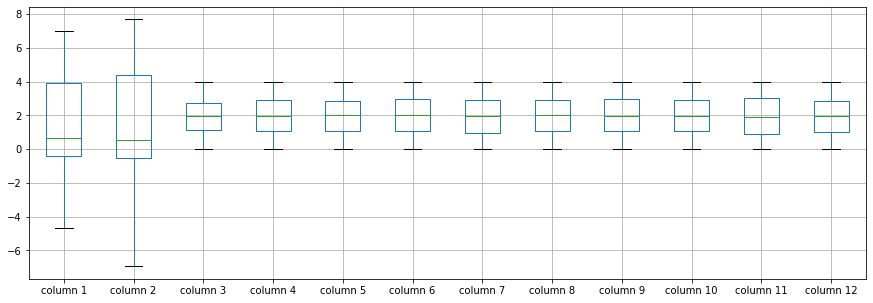

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.461641
column 2     1.259335
column 3     1.967262
column 4     1.962011
column 5     1.997370
column 6     2.003794
column 7     1.946525
column 8     2.019095
column 9     1.982837
column 10    1.961056
column 11    1.957569
column 12    1.977307
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.373595,0.002762,-0.015922,0.074286,-0.020698,0.029617,0.024433,-0.028922,0.045878,-0.005633,0.039523
column 2,-0.373595,1.000000,-0.009172,0.011217,-0.017388,-0.036712,0.039878,0.001619,-0.064811,-0.017120,-0.054658,0.023133
column 3,0.002762,-0.009172,1.000000,-0.091386,0.021001,-0.021324,0.043716,0.024079,0.055532,0.023523,-0.017739,-0.068071
column 4,-0.015922,0.011217,-0.091386,1.000000,0.007659,-0.015868,-0.012080,-0.008104,-0.040824,0.054252,0.107580,-0.020540
column 5,0.074286,-0.017388,0.021001,0.007659,1.000000,0.072333,0.035907,0.033866,-0.044391,-0.059424,0.025957,0.041028
column 6,-0.020698,-0.036712,-0.021324,-0.015868,0.072333,1.000000,-0.100297,0.052892,0.020936,0.005852,-0.047495,-0.021201
column 7,0.029617,0.039878,0.043716,-0.012080,0.035907,-0.100297,1.000000,-0.000086,-0.034426,-0.006457,0.021461,0.006431
column 8,0.024433,0.001619,0.024079,-0.008104,0.033866,0.052892,-0.000086,1.000000,-0.102073,-0.093216,0.008110,-0.005304
column 9,-0.028922,-0.064811,0.055532,-0.040824,-0.044391,0.020936,-0.034426,-0.102073,1.000000,0.011359,-0.015097,0.006144
column 10,0.045878,-0.017120,0.023523,0.054252,-0.059424,0.005852,-0.006457,-0.093216,0.011359,1.000000,-0.100753,0.022718


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+78,12+78+78,12+78+78,12+78+78+78+78,12+78+78+78+78+78,12+78+78+78+78,12+78+78+78,12+78+78,12+78,12], vae_layer = False, seed = 80)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 23.57755084991455
Epoch: 1 , loss: 23.020623168945313
Epoch: 2 , loss: 19.712888565063476
Epoch: 3 , loss: 18.83505928039551
Epoch: 4 , loss: 18.59544979095459
Epoch: 5 , loss: 18.370321846008302
Epoch: 6 , loss: 18.094619483947753
Epoch: 7 , loss: 17.891150455474854
Epoch: 8 , loss: 17.633270149230956
Epoch: 9 , loss: 17.344473400115966
Epoch: 10 , loss: 17.400756225585937
Epoch: 11 , loss: 17.290190544128418
Epoch: 12 , loss: 17.072203350067138
Epoch: 13 , loss: 16.99152370452881
Epoch: 14 , loss: 16.84937623977661
Epoch: 15 , loss: 16.541895942687987
Epoch: 16 , loss: 16.560469341278075
Epoch: 17 , loss: 16.445102100372313
Epoch: 18 , loss: 16.388246688842774
Epoch: 19 , loss: 16.321716842651366
Epoch: 20 , loss: 16.122209758758544
Epoch: 21 , loss: 16.36137083053589
Epoch: 22 , loss: 16.10769468307495
Epoch: 23 , loss: 16.299669322967528
Epoch: 24 , loss: 16.180629596710205
Epoch: 25 , loss: 16.184

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.790261
column 3     3.034900
column 4     1.324277
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.000000,1.186459,0.000000,0.851479,0.0,0.000000,-1.487796,-1.516252,0.000000,0.0,0.000000
1,1.007242,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-1.699716,0.0,0.000000
2,0.000000,0.000000,-1.775987,-2.335989,0.000000,0.0,0.000000,0.000000,-0.816644,0.000000,0.0,0.000000
3,1.836762,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-0.938188
4,0.000000,0.000000,0.000000,0.000000,-3.082054,0.0,0.000000,0.000000,0.000000,-0.598101,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,4.032366,0.000000,0.000000,0.000000,0.0,1.182539,0.000000,0.000000,0.000000,0.0,0.000000
796,0.000000,0.000000,-2.157246,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
797,0.000000,0.000000,0.000000,0.000000,-0.755866,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.984457
798,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(83.64282434062726, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.33696780124862036

In [18]:
new_df.iloc[66,:]

column 1     0.207620
column 2    -0.550520
column 3     1.052638
column 4     1.794800
column 5     1.401300
column 6     2.765800
column 7     1.304100
column 8     1.028036
column 9     1.059400
column 10    1.284300
column 11    1.879400
column 12    0.575240
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,1.253810,3.533700,1.321069,0.67908,3.434400,1.304604,1.260048,1.699100,3.815600,1.746400
1,0.908737,-0.178570,2.062800,2.921600,0.424720,1.17850,1.680200,1.388800,3.216700,1.223884,0.772910,0.641450
2,-0.169460,0.501530,0.694913,0.729011,1.567600,1.48240,0.921600,2.642400,0.702056,2.531800,2.432800,1.876800
3,1.700712,0.472790,0.588090,1.956300,2.787000,2.59570,2.893300,1.537500,0.999420,3.659300,0.618250,2.327612
4,0.098830,0.234180,0.429700,1.631200,0.472046,2.27110,0.374250,2.178600,1.314000,0.465099,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,1.345666,1.576000,0.556120,0.070769,2.07470,1.985579,3.222900,3.493300,1.325500,3.231100,0.005387
796,3.466600,-4.034600,0.943154,1.346100,1.377300,2.28870,0.396130,2.396100,2.463500,1.667500,2.461700,1.226700
797,3.344800,-2.384300,2.031000,2.264600,2.585334,1.53700,1.225600,0.740270,2.495400,1.343300,1.622500,2.569757
798,3.441400,-5.216300,1.577000,1.844000,1.098700,3.42430,0.810810,3.727000,1.187900,0.951120,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_NG_20(imp).xlsx", index=False, header=False)